In [4]:
# Load dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [6]:
# Load data from the csv file

datadf = pd.read_csv("Dataset/fraud_data.csv")

# Descriptive statistics of the data
print(datadf.describe())

# Describe the data
print(datadf.info())


                amt           lat          long      city_pop     merch_lat  \
count  14446.000000  14446.000000  14446.000000  1.444600e+04  14446.000000   
mean     124.430073     39.787692   -110.874225  1.065370e+05     39.787991   
std      231.352587      5.317039     12.985813  2.902916e+05      5.360593   
min        1.000000     20.027100   -165.672300  4.600000e+01     19.032689   
25%       12.080000     36.715400   -120.415800  4.930000e+02     36.794655   
50%       51.520000     39.666200   -111.098500  1.645000e+03     39.620953   
75%      101.030000     41.940400   -101.136000  3.543900e+04     42.275740   
max     3261.470000     66.693300    -89.628700  2.383912e+06     67.510267   

         merch_long  
count  14446.000000  
mean    -110.874892  
std       12.995596  
min     -166.670685  
25%     -120.146253  
50%     -111.192629  
75%     -100.446822  
max      -88.646366  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (

In [9]:
# Convert 'trans_date_trans_time' column to datetime type
datadf['trans_date_trans_time'] = pd.to_datetime(datadf['trans_date_trans_time'], format='%d-%m-%Y %H:%M')

# Extract date components from 'trans_date_trans_time'
datadf['trans_year'] = datadf['trans_date_trans_time'].dt.year
datadf['trans_month'] = datadf['trans_date_trans_time'].dt.month
datadf['trans_day'] = datadf['trans_date_trans_time'].dt.day
datadf['trans_hour'] = datadf['trans_date_trans_time'].dt.hour
datadf['trans_minute'] = datadf['trans_date_trans_time'].dt.minute
datadf['trans_second'] = datadf['trans_date_trans_time'].dt.second

# Convert 'dob' column to datetime type 
datadf['dob'] = pd.to_datetime(datadf['dob'], format='%d-%m-%Y')

# Extract year from 'dob'
datadf['dob_year'] = datadf['dob'].dt.year


# Drop unwanted rows and clean up formatting
datadf = datadf[(datadf['is_fraud'] == "0") | (datadf['is_fraud'] == "1")]
datadf.dropna()
datadf = datadf[datadf["amt"]<=1500]
datadf['merchant'] = datadf['merchant'].str.replace('"', '')
datadf['job'] = datadf['job'].str.replace('"', '')

# Calculate age at time of transaction and add column
datadf['age'] = ((pd.to_datetime(datadf['trans_date_trans_time']) - datadf['dob']).dt.days // 365).astype(int)

# Create sub-dataframes and print confines of dataset
datadf #complete and cleaned dataframe
#frauddf = datadf[datadf["is_fraud"]=="1"] #dataframe of all fradulent data (best for after all columns are added)
#truedf = datadf[datadf["is_fraud"]=="0"] #dataframe of all clean data (best for after all columns are added)
print(f'The dataset begins on {datadf["trans_date_trans_time"].min()}.')
print(f'The dataset ends on {datadf["trans_date_trans_time"].max()}.')

The dataset begins on 2019-01-01 00:00:00.
The dataset ends on 2020-12-31 23:59:00.


In [10]:
import math
def haversine(lon1, lat1, lon2, lat2):

    # Convert latitude and longitude from degrees to radians
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    # Radius of the Earth in km
    R = 6371.0
    
    # Calculate distance
    distance = R * c
    
    return distance
datadf['trans_dist'] = datadf.apply(lambda row: haversine(row['long'], row['lat'], row['merch_long'], row['merch_lat']), axis=1)
datadf.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,...,is_fraud,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_second,dob_year,trans_dist,age
0,2019-01-04 00:58:00,"Stokes, Christiansen and Sipes",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,1,2019,1,4,0,58,0,1939,109.285552,79
1,2019-01-04 15:06:00,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,1,2019,1,4,15,6,0,1939,79.856896,79
2,2019-01-04 22:37:00,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,1,2019,1,4,22,37,0,1939,66.807915,79
3,2019-01-04 23:06:00,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,1,2019,1,4,23,6,0,1939,39.636227,79
4,2019-01-04 23:59:00,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,1,2019,1,4,23,59,0,1939,77.611529,79


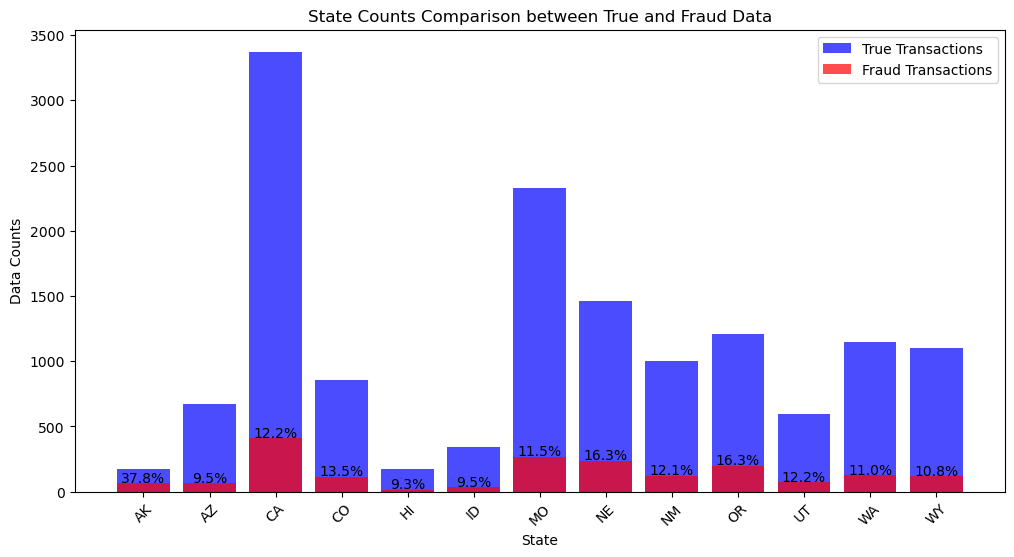

In [14]:
frauddf = datadf[datadf["is_fraud"]=="1"] #dataframe of all fradulent data (best for after all columns are added)
truedf = datadf[datadf["is_fraud"]=="0"] #dataframe of all clean data (best for after all columns are added)

# Category counts for true, fraud, and total counts
fraudstate = frauddf["state"].value_counts().reset_index().rename(columns={'index': 'state'})
truestate = truedf["state"].value_counts().reset_index().rename(columns={'index': 'state'})
totalstate = datadf["state"].value_counts().reset_index().rename(columns={'index': 'state'})

# Merge data
statecount = pd.merge(totalstate, truestate, on="state", how='outer')
statecount = pd.merge(statecount, fraudstate, on="state", how='outer')
statecount.columns = ['state', 'total_count' , 'true_count', 'fraud_count']

# Percentage of fraud data compared to total data
statecount['fraud_percentage'] = (statecount['fraud_count'] / statecount['total_count']) * 100

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(statecount['state'], statecount['total_count'], color='b', alpha=0.7, label='True Transactions')
plt.bar(statecount['state'], statecount['fraud_count'], color='r', alpha=0.7, label='Fraud Transactions')
plt.xlabel('State')
plt.ylabel('Data Counts')
plt.title('State Counts Comparison between True and Fraud Data')
plt.legend()

# Display percentage information on the plot
for i, row in statecount.iterrows():
    plt.text(i, row['fraud_count'] + 10, f"{row['fraud_percentage']:.1f}%", ha='center')

plt.xticks(rotation=45)
plt.show()

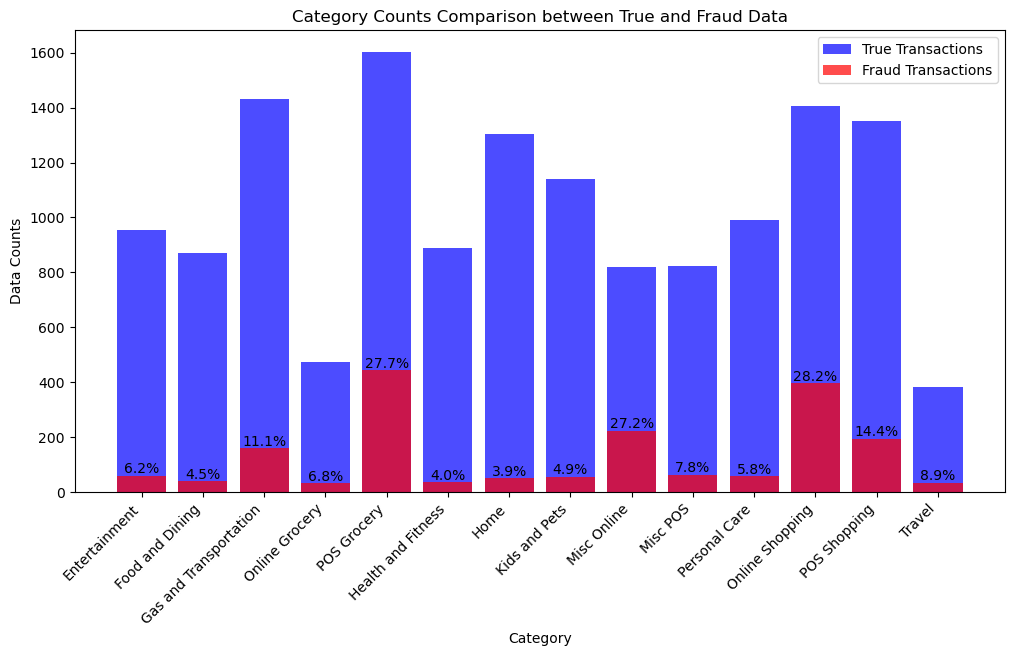

In [13]:
# Category counts for true, fraud, and total counts
totalcat = datadf["category"].value_counts().reset_index().rename(columns={'index': 'category'})
truecat = truedf["category"].value_counts().reset_index().rename(columns={'index': 'category'})
fraudcat = frauddf["category"].value_counts().reset_index().rename(columns={'index': 'category'})

# Merge data
catcount = pd.merge(totalcat, truecat, on="category", how='outer')
catcount = pd.merge(catcount, fraudcat, on="category", how='outer')
catcount.columns = ['category', 'total_count' , 'true_count', 'fraud_count']
catrename = {'entertainment': "Entertainment", 
        'food_dining':"Food and Dining", 
        'gas_transport': "Gas and Transportation", 
        'grocery_net': "Online Grocery",
        'grocery_pos': "POS Grocery", 
        'health_fitness': "Health and Fitness", 
        'home': "Home", 
        'kids_pets': "Kids and Pets", 
        'misc_net':"Misc Online",
        'misc_pos': "Misc POS", 
        'personal_care': "Personal Care", 
        'shopping_net' :"Online Shopping", 
        'shopping_pos':"POS Shopping",
        'travel':"Travel"}
catcount['category'] = catcount['category'].replace(catrename)

# Percentage of fraud data compared to total data
catcount['fraud_percentage'] = (catcount['fraud_count'] / catcount['total_count']) * 100

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(catcount['category'], catcount['total_count'], color='b', alpha=0.7, label='True Transactions')
plt.bar(catcount['category'], catcount['fraud_count'], color='r', alpha=0.7, label='Fraud Transactions')
plt.xlabel('Category')
plt.ylabel('Data Counts')
plt.title('Category Counts Comparison between True and Fraud Data')
plt.legend()

# Display percentage information on the plot
for i, row in catcount.iterrows():
    plt.text(i, row['fraud_count'] + 10, f"{row['fraud_percentage']:.1f}%", ha='center')

plt.xticks(rotation=45, ha='right')
plt.show()